In [1]:
import plotly.express as px
import tbparse

In [2]:
def visualize_loss(model_top_dir, model_name):

    reader = tbparse.SummaryReader(f"{model_top_dir}/checkpoints/runs/", pivot=True)

    fig = px.scatter(
        reader.scalars,
        x=reader.scalars.index,
        y='train/loss',
        title=f"{model_name} - loss",
        labels={'x': 'steps'},
        trendline="rolling",
        trendline_options=dict(window=40, win_type="blackmanharris", min_periods=1),
        trendline_color_override="red",
        width=800,
        height=400,
        template="plotly_white",
    )
    fig.update_traces(marker=dict(size=3))
    fig.show('png')

    fig = px.scatter(
        reader.scalars,
        x=reader.scalars.index,
        y='train/grad_norm',
        title=f"{model_name} - gradient norm",
        labels={'x': 'steps'},
        trendline="rolling",
        trendline_options=dict(window=40, win_type="blackmanharris", min_periods=1),
        trendline_color_override="red",
        width=800,
        height=400,
        template="plotly_white",
    )
    fig.update_traces(marker=dict(size=3))
    fig.show('png')

    fig = px.scatter(
        reader.scalars,
        x=reader.scalars.index,
        y='train/learning_rate',
        title=f"{model_name} - learning rate",
        labels={'x': 'steps'},
        width=800,
        height=400,
        template="plotly_white",
    )
    fig.update_traces(marker=dict(size=3))
    fig.show('png')

# Gemma

```
learning_rate = 1e-4
lora_dropout=0.05
```

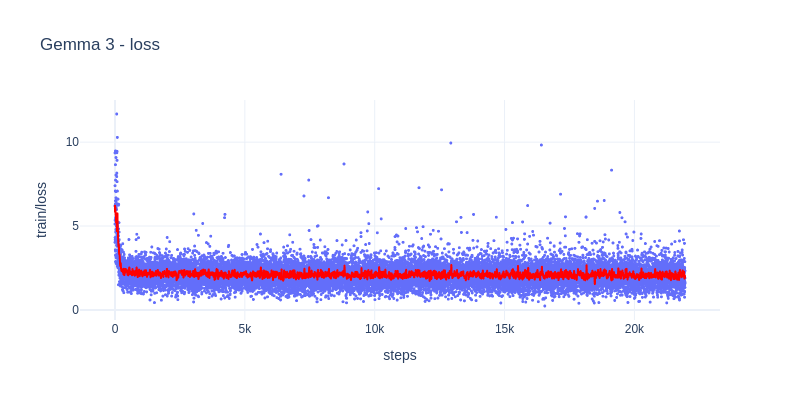

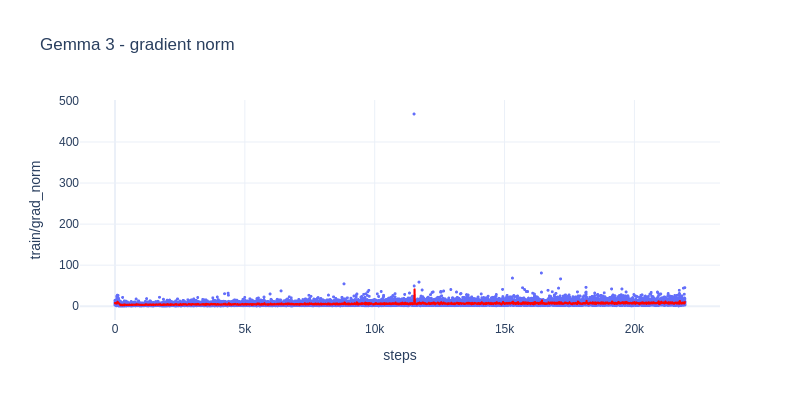

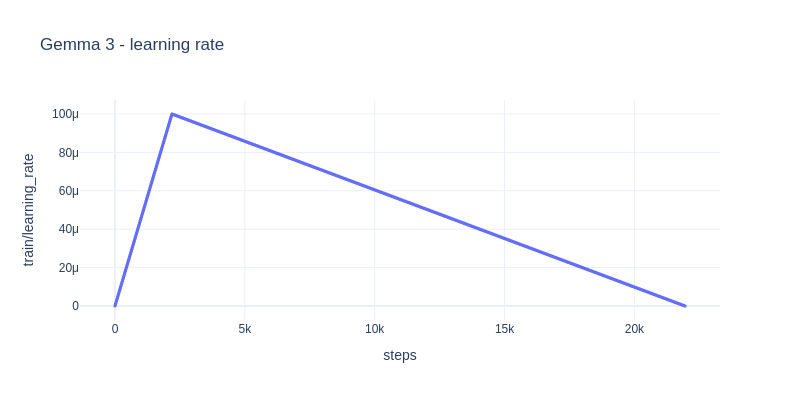

In [3]:
visualize_loss("model_unsloth_gemma-3-27b-it-bnb-4bit-qlora-social-media", "Gemma 3")

# Llama

```
learning_rate = 1e-4
lora_dropout=0.05
```

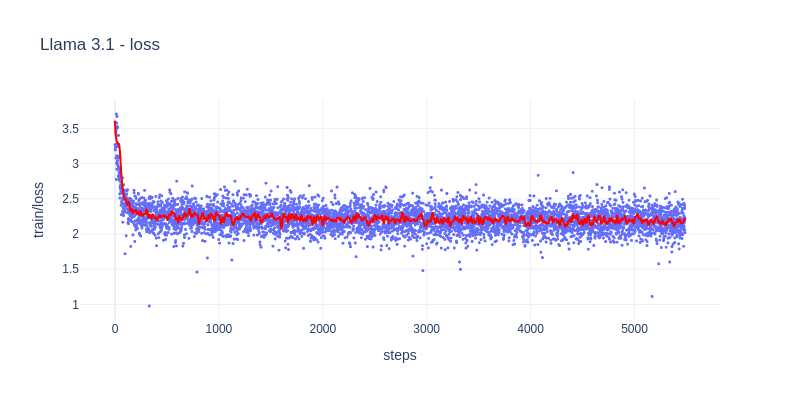

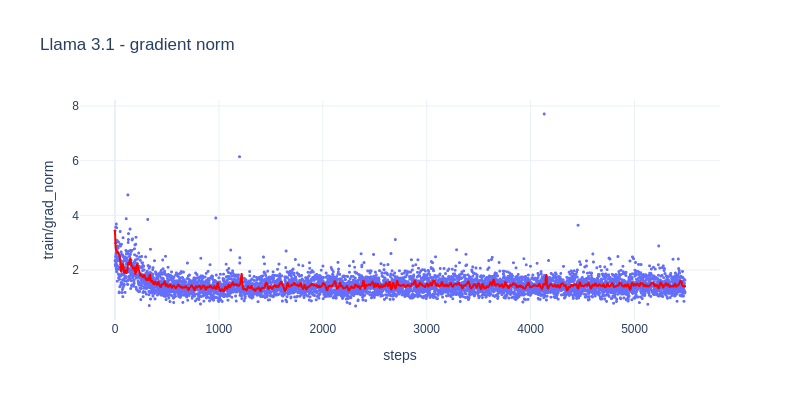

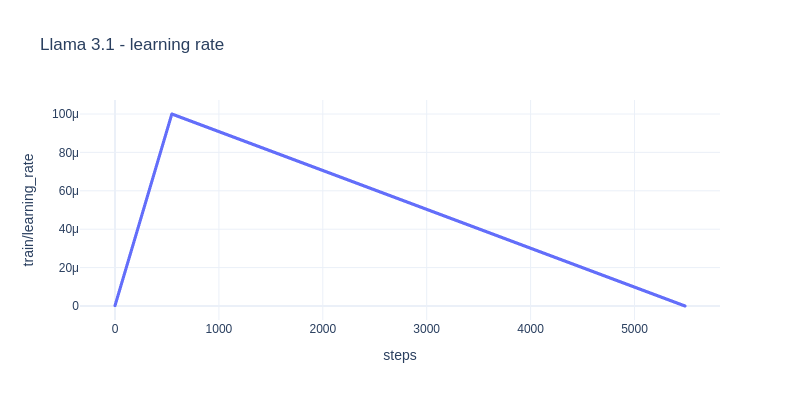

In [4]:
visualize_loss("model_unsloth_meta-llama-3.1-8b-instruct-bnb-4bit-qlora-social-media", "Llama 3.1")